<a href="https://colab.research.google.com/github/nyp-sit/sdaai-iti103/blob/master/session-4/4_Classification_Solution(extra).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification



## MNIST

MNIST is a set of 70,0000 small handwritten images by high school students and employees of the US Census Bureau.  Each image is labeled with the digit it represents.  Scikit-Learn provides helper functions to download popular datasets, and MNIST is one of them.  

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

Datasets loaded by Scikit-Learn generally have a similar dictionary structure where data key contains an array with one row per instance and one column per feature.  The target key contains an array with the label.

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
print(X[:10])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
y.shape

(70000,)

In [6]:
print(y[:10])

['5' '0' '4' '1' '9' '2' '1' '3' '1' '4']


There are 70000 images and each image has 784 features, which is 28x28 pixels, and whch feature represent one pixel's intensity from 0 to 255.   Let's take a look at the first digit from the dataset.

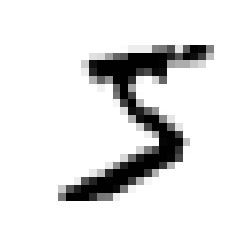

In [7]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [8]:
X[0].reshape(28,28).shape

(28, 28)

In [9]:
y[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

Split the first 60000 images into a training set, and the last 10000 images as a test set.

In [ ]:
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
#shuffle_index = np.random.permutation(60000)
#X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Binary classifier

**Question 1**

Creates a binary classifier capable of distinguishing between just two classes, 5 and not-5.  


*   Creates the target vectors for this classification task
*   Use Logistic Regression and trainit on the whole training set.  
*   Predict the outcome of images of the number 5



In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [12]:
print(y_train_5[:20])


[ True False False False False False False False False False False  True
 False False False False False False False False]


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [14]:
sgd_clf.predict([some_digit])

array([ True])

## Measuring Accuracy using Cross-Validation


**Question 2**

Evaluate the model using cross-validation with the cross_val_score() function, with 3 folds.  

In [79]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9633 , 0.95695, 0.9146 ])

## Confusion Matrix

**Question 3**

A much better way to evaluate the performance of a classifier is to look at the confusion matrix.  


*   Generate a set of predictions on the test set
*   Compute the confusion matrix using the confusion_matrix() function



In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [81]:
y_train_pred.shape

(60000,)

In [82]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[52336,  2243],
       [ 1060,  4361]])

In [83]:
sgd_clf.classes_

array([False,  True])

A perfect classifier would have noly true positives and true negatives, so its confusion matrix would have non zero values only on its main diagonal.

In [20]:
y_train_perfect_predictions = y_train_5  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

## Precision and Recall

**Question 4**

Compute the precision, recall and F1 score

In [87]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.6603573591762568

Calculate the precision manually using the formula,

`precision = TP/(TP+FP)`

In [22]:
3530 / (3530 + 687 )

0.8370879772350012

In [88]:
recall_score(y_train_5, y_train_pred)

0.8044641210108836

Calculate the recall manually using the formula,

`recall = TP/(TP+FN)`

In [85]:
3530 / (3530 + 1891)

0.6511713705958311

In [89]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7253222453222454

Calculate the F1 score manually using the formula

`F1 = 2*precision*recall/(precision + recall)`

In [27]:
2*(0.8370879772350012 *0.6511713705958311)/(0.8370879772350012 + 0.6511713705958311)

0.7325171197343846

## Precision and recall tradeoff

Use the decision_function() method to compute the scores.   With a higher threshold, it decreases the recall.  To decide which threshold to use, get the scores of all instances in the training set using the cross_val_predict() function to return decision scores instead of predictions.

In [28]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

With threshold = 0, the prediction is correct.

In [29]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

With threshold = 8000, prediction is wrong.

In [30]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

Perform cross validation to get the scores for all instances.

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [ ]:
y_mask = (y_scores > 5000).sum()

In [73]:
y_mask

2393

Compute precision and recall for all possible thresholds using the precision_recall_curve function.

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [56]:
thresholds[-20:]

array([30919.23988721, 31131.71083025, 31196.62975125, 31491.56779645,
       31839.58732479, 31847.88726914, 32149.32407536, 32447.6679598 ,
       33498.67560166, 33976.83062516, 34530.18696047, 34547.44702864,
       34662.20950045, 35261.17927701, 35987.20307515, 36801.60697028,
       37026.25116503, 38871.26391927, 42216.05562787, 49441.43765905])

In [57]:
precisions[-20:]

array([0.84210526, 0.83333333, 0.82352941, 0.8125    , 0.86666667,
       0.85714286, 0.84615385, 0.83333333, 0.81818182, 0.8       ,
       0.77777778, 0.875     , 0.85714286, 0.83333333, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

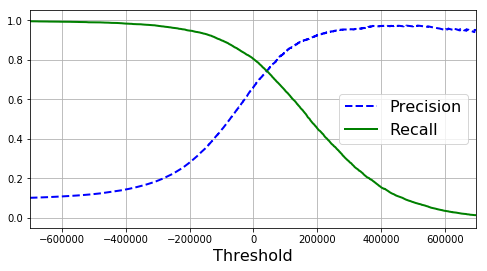

In [92]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    
plt.figure(figsize=(8, 4))      
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])           
plt.show()

In [107]:
y_train_pred[y_scores > 0].shape

(6604,)

In [93]:
(y_train_pred == (y_scores > 0)).all()

True

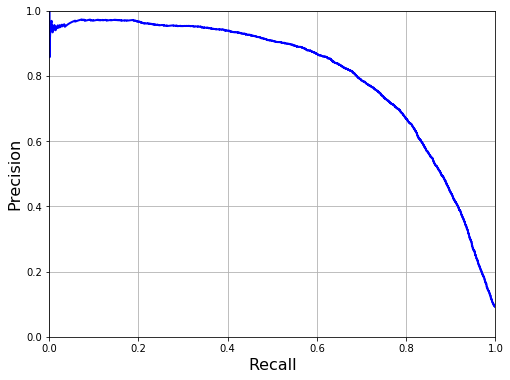

In [94]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

We want to aim for 90% precision, compute the threshold value.

In [109]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

163633.30315197556

In [ ]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [120]:
y_train_pred_90

array([False, False, False, ...,  True, False, False])

Compute the precision and recall score

In [121]:
precision_score(y_train_5, y_train_pred_90)

0.9002517306482064

In [122]:
recall_score(y_train_5, y_train_pred_90)

0.5277624054602472

# ROC Curves

The receiver operation characteristic (ROC) curve is another common tool used with binary classifiers.  It is similar to the precision/recall curve, but it plots the true positive rate (recall) against the false positive rate.  

**Question 5**

Compute the True positive rate (TPR), False positive rate (FPR) for various thresholds using the roc_curve() function.

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

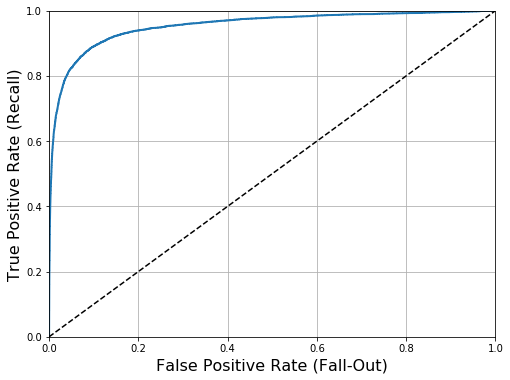

In [125]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                        
plot_roc_curve(fpr, tpr)
             
plt.show()

The higher the recall (TPR), the more false positives (FPR) the classifier produces.  The dotted line represents the ROC curve of a purely random classifier, a good classfier stays as far away from the line as possible.

**Quesiton 6**

Compute the area under the curve (AUC).  

In [126]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9536789698168869

# Multiclass classification

Multiclass classifiers distinguish between more than two classess.  Scikit-learn detects when you try to use a binary classification alogorithm for a multiple class classification task and it automatically runs one-versus-all (OvA)

**Question 7**

Use Linear Regression to train the original target classes from 0 to 9 and make a prediction of the first digit.

In [ ]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5
predict = sgd_clf.predict([some_digit])

In [130]:
print(predict)

[3]


Under the hood, Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the image and selected the class with the highest score.  

**Question 8**

Conpute the scores using the decision_function() method to return 10 scores, one per class.

In [131]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-473897.80801197, -644255.86485802, -347352.99430408,
         -30942.4528106 , -560971.15600433,  -42695.14872161,
        -495355.44702264, -327659.64997194, -485909.1798798 ,
        -495629.95766748]])

The highest score is the one corresponding to the correct class.

In [132]:
np.argmax(some_digit_scores)

3

In [134]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [135]:
sgd_clf.classes_[5]

5

**Question 9**

Use OvO strategy to train and predict the digit.

In [136]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=1000, tol=1e-3, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [137]:
len(ovo_clf.estimators_)

45

**Question 10**

Use cross_val_score to evaluate the classifier

In [138]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.86682663, 0.80704035, 0.87778167])

**Question 11**

Use Standard Scalar to scale to improve the accuracy of the classifier

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90461908, 0.90654533, 0.91273691])

**Question 12**

Compute the confusion matrix of the classifier.

In [140]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5717,    2,   28,   11,   10,   43,   55,    8,   46,    3],
       [   1, 6462,   42,   27,    6,   38,    9,    9,  136,   12],
       [  57,   38, 5315,   94,   89,   30,  112,   53,  154,   16],
       [  46,   45,  139, 5326,    4,  237,   42,   61,  133,   98],
       [  18,   21,   36,    9, 5360,    8,   56,   30,   94,  210],
       [  80,   39,   37,  180,   85, 4594,  114,   26,  168,   98],
       [  30,   24,   39,    2,   40,   97, 5635,    4,   47,    0],
       [  25,   26,   67,   30,   58,   10,    4, 5792,   19,  234],
       [  52,  145,   72,  160,   14,  161,   56,   25, 5022,  144],
       [  40,   32,   30,   91,  174,   30,    2,  214,   81, 5255]])

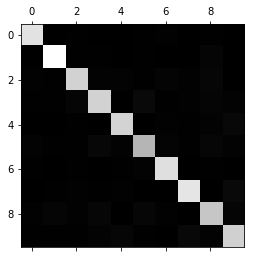

In [142]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

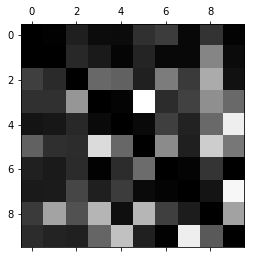

In [145]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [153]:
recall_score(y_train, y_train_pred, average=None)

array([0.96522033, 0.9584693 , 0.89207788, 0.86870005, 0.91749401,
       0.84744512, 0.95217979, 0.9245012 , 0.85831482, 0.88334174])

In [154]:
precision_score(y_train, y_train_pred, average=None)

array([0.94246621, 0.94556629, 0.91559001, 0.89814503, 0.91780822,
       0.8753811 , 0.92604766, 0.93089039, 0.85118644, 0.86573311])

In [170]:
precision_score(y_train, y_train_pred, average=None).sum()/10

0.9068814443410969

In [169]:
precision_score(y_train, y_train_pred, average='micro')

0.9079666666666667

In [171]:
precision_score(y_train, y_train_pred, average='macro')

0.9068814443410969

In [158]:
conf_mx

array([[5717,    2,   28,   11,   10,   43,   55,    8,   46,    3],
       [   1, 6462,   42,   27,    6,   38,    9,    9,  136,   12],
       [  57,   38, 5315,   94,   89,   30,  112,   53,  154,   16],
       [  46,   45,  139, 5326,    4,  237,   42,   61,  133,   98],
       [  18,   21,   36,    9, 5360,    8,   56,   30,   94,  210],
       [  80,   39,   37,  180,   85, 4594,  114,   26,  168,   98],
       [  30,   24,   39,    2,   40,   97, 5635,    4,   47,    0],
       [  25,   26,   67,   30,   58,   10,    4, 5792,   19,  234],
       [  52,  145,   72,  160,   14,  161,   56,   25, 5022,  144],
       [  40,   32,   30,   91,  174,   30,    2,  214,   81, 5255]])

In [159]:
conf_mx.sum(axis=0)

array([6066, 6834, 5805, 5930, 5840, 5248, 6085, 6222, 5900, 6070])

In [ ]:
fp = (conf_mx.sum(axis=0)-conf_mx.diagonal()).sum()

In [ ]:
tp = conf_mx.diagonal().sum()

In [167]:
pr = tp / (tp+fp)
print(pr)

0.9079666666666667
